# Boston Housing Data

**Project Scenario**: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.
- Is there a significant difference in the median value of houses bounded by the Charles river or not?
- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

Details regarding the project will be broken down in the next reading sections.

## About the data

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Import necessary modules

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm

## Import data

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [3]:
boston_df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

## Generate Descriptive Statistics and Visualizations

### For the "Median value of owner-occupied homes" provide a **boxplot**

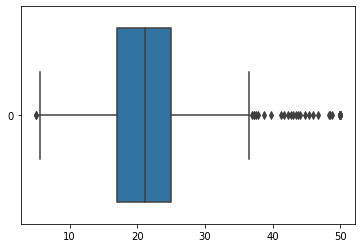

In [4]:
ax = sns.boxplot(data=boston_df['MEDV'], orient='h')

### Provide a **histogram** for the Charles river variable

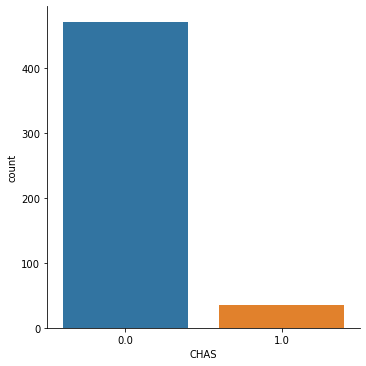

In [5]:
ax = sns.catplot(x='CHAS', data=boston_df, kind='count')

### Provide a **boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [6]:
boston_df.loc[(boston_df['AGE']<=35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70), 'age_group'] = '70 years and older'

In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


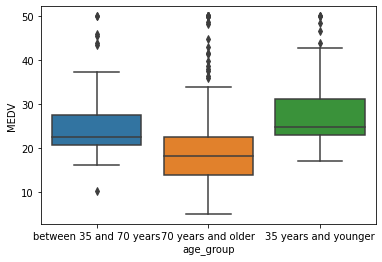

In [8]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)

### Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

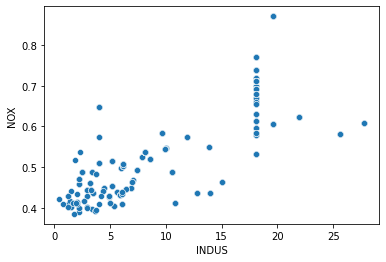

In [9]:
ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df) 

As nitric oxide concentration increases, the proportion of non-retail business acres per town increases

### Create a **histogram** for the pupil to teacher ratio variable

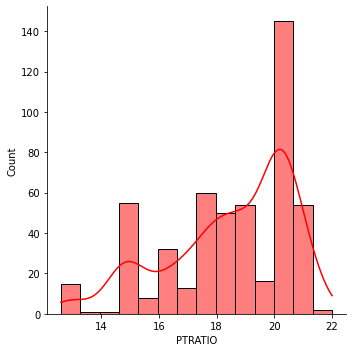

In [10]:
ax = sns.displot(x='PTRATIO', data=boston_df, kde=True, color='red')

## Use the appropriate tests to answer the questions provided

For each of the following questions;
- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:
1. State your hypothesis.
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0: There's no mean difference in the median value of owner-occupied homes based on the Charles rive variables<br>
H1: There's mean difference in the median value of owner-occupied homes based on the Charles rive variables<br>
Alpha = 0.05

In [11]:
boston_df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [12]:
scipy.stats.levene(boston_df[boston_df['CHAS']==0.0]['MEDV'],
                   boston_df[boston_df['CHAS']==1.0]['MEDV'], center='mean')
#p-value less than 0.05 - unequal variance 

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [13]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0.0]['MEDV'],
                      boston_df[boston_df['CHAS']==1.0]['MEDV'], equal_var=False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

P-value obtained is less than the alpha. We reject the null hypothesis as there is enough evidence that there's mean difference in the median value of owner-occupied homes based on the Charles rive variables

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0: There's no mean difference in the median value of owner-occupied homes based on the age groups<br>
H1: There's mean difference in the median value of owner-occupied homes based on the age groups<br>
Alpha = 0.05

In [14]:
boston_df['age_group'].value_counts()

70 years and older         287
between 35 and 70 years    128
35 years and younger        91
Name: age_group, dtype: int64

In [15]:
thirtyfive_lower_MEDV= boston_df[boston_df['age_group']=='35 years and younger']['MEDV']
thirtyfive_seventy_MEDV= boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV']
seventy_older_MEDV= boston_df[boston_df['age_group']=='70 years and older']['MEDV']

In [16]:
scipy.stats.levene(thirtyfive_lower_MEDV, thirtyfive_seventy_MEDV, 
                   seventy_older_MEDV, center='mean')
#p-value greater than 0.05 - equal variance 

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [17]:
scipy.stats.f_oneway(thirtyfive_lower_MEDV, thirtyfive_seventy_MEDV, seventy_older_MEDV,)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

P-value obtained is greater than the alpha. We fail to reject the null hypothesis as there is not enough evidence that there's mean difference in the median values of houses based on the age groups

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0: There's no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town<br>
H1: There's correlation between Nitric oxide concentrations and proportion of non-retail business acres per town<br>
Alpha = 0.05

In [18]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS']) 

(0.7636514469209155, 7.913361061236445e-98)

P-value obtained is less than the alpha. We reject the null hypothesis as there is evidence that there's correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0: There's no correlation between weighted distance to the five Boston employment centres and median value of owner occupied homes<br>
H1: There's correlation between weighted distance to the five Boston employment centres and median value of owner occupied homes<br>
Alpha = 0.05

In [23]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) # add an intercept (beta_0) to our model

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           1.21e-08
Time:                        19:19:57   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-value obtained is less than the alpha. We reject the null hypothesis as there is evidence that there's correlation (weak positive correlation) between weighted distance to the five Boston employment centres and median value of owner occupied homes